In [1]:
# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Explore the regret of UCB in reinforcement learning
# Define a function to simulate the reward of each arm
def reward(arm):
    if arm == 1:
        return np.random.binomial(1, 0.95)
    elif arm == 2:
        return np.random.binomial(1, 0.9)
    elif arm == 3:
        return np.random.binomial(1, 0.1)
    
def UCB(arm, t, N, R):
    if N[arm-1] == 0:
        return 1
    else:
        return R[arm-1]/N[arm-1] + np.sqrt(2*np.log(t)/N[arm-1])
    
def greedy(arm, t, N, R):
    if N[arm-1] == 0:
        return 1
    else:
        return R[arm-1]/N[arm-1]
    
def epsilon_greedy(arm, t, N, R, epsilon):
    if np.random.uniform() < epsilon:
        return np.random.uniform()
    else:
        return greedy(arm, t, N, R)
    
def optimal_arm(N, R):
    return np.argmax(R/N)

def optima_value(N, R):
    return np.max(R/N)

def regret(arm, t, N, R):
    # return 1 if the res is nan
    res = optima_value(N, R) - greedy(arm, t, N, R)
    if np.isnan(res):
        return 1
    else:
        return res

In [25]:
# Initialize the first N pulls
# Randomly pull the three arms N_ini times
N_ini = 10
t_tot = 100


t = np.arange(1, t_tot+1)
picked_arm = np.zeros(t_tot)
N = np.zeros(3)
R = np.zeros(3)
picked_R = np.zeros(t_tot)
total_regret = np.zeros(t_tot)

for i in range(N_ini):
    arm = np.random.randint(1, 4)

    # Keep track of times each arm is pulled
    N[arm-1] += 1
    # Keep track of which arm is pulled
    picked_arm[i] = arm
    # Keep track of the reward of each arm
    cur_R = reward(arm)
    R[arm-1] += cur_R

    # Keep track of the regret
    total_regret[i] = regret(arm, i+1, N, R)

print(N)

# Start the RL algorithm
for i in range(N_ini, t_tot):
    # Decide which arm to pull
    arm_val_list = np.array([UCB(1, i+1, N, R), UCB(2, i+1, N, R), UCB(3, i+1, N, R)])
    arm = np.argmax(arm_val_list) + 1
    # make sure the arm is randomly chosen when the max is not unique
    if np.isclose(arm_val_list[arm-1], np.max(arm_val_list)).sum() > 1:
        arm = np.random.choice(np.where(np.isclose(arm_val_list, np.max(arm_val_list)))[0]) + 1

    # Keep track of times each arm is pulled
    N[arm-1] += 1
    # Keep track of which arm is pulled
    picked_arm[i] = arm
    # Keep track of the reward of each arm
    cur_R = reward(arm)
    R[arm-1] += cur_R

    # Keep track of the regret
    total_regret[i] = regret(arm, i+1, N, R)

# Record the results
total_regret_UCB = np.cumsum(total_regret)

[3. 3. 4.]


/var/folders/gf/j4j20wvx1d77qj5hx1gjrwf40000gn/T/ipykernel_49404/1153636375.py:33: RuntimeWarning: invalid value encountered in divide
  return np.max(R/N)


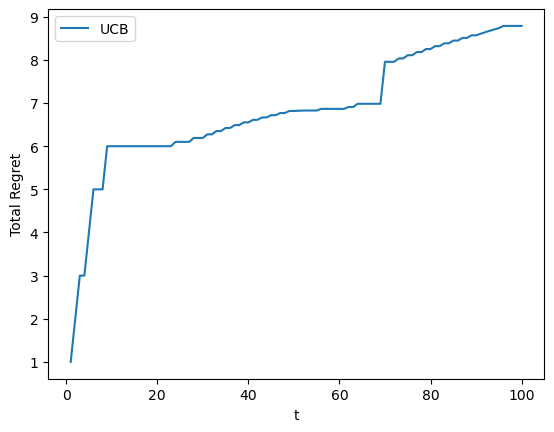

In [26]:
# Plot the results as a function of t
plt.plot(t, total_regret_UCB, label='UCB')
plt.xlabel('t')
plt.ylabel('Total Regret')
plt.legend()

In [9]:
total_regret_UCB

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [23]:
total_regret

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.5       , 1.        , 0.4       ,
       0.        , 0.33333333, 0.        , 0.21428571, 0.17857143,
       0.15079365, 0.22857143, 0.        , 0.        , 0.        ,
       0.15508021, 0.13235294, 0.88235294, 0.        , 0.11965812,
       0.        , 0.10902256, 0.        , 0.1       , 0.        ,
       0.0922619 , 0.        , 0.0855615 , 0.        , 0.07971014,
       0.        , 0.03289474, 0.025     , 0.01785714, 0.01136364,
       0.00543478, 0.        , 0.        , 0.04      , 0.        ,
       0.        , 0.        , 0.        , 0.89655172, 0.        ,
       0.        , 0.        , 0.06009615, 0.        , 0.05723906,
       0.        , 0.05462185, 0.        , 0.05221675, 0.        ,
       0.05      , 0.        , 0.04795118, 0.        , 0.04605